## Bài toán
Dự đoán sinh viên **Đậu** hoặc **Không đậu** dựa trên bài toán phân loại với Logistic Regression. Data gồm 2 cột dữ liệu là kết quả 2 bài kiểm tra và labels tương ứng

Data được đặt ở [link file csv](https://drive.google.com/file/d/1Yzct5Waje8WT5emQwedOAIcQfR5mCRcd/view?usp=sharing)

### Define những thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('../data/data_logistic_regression.csv', header=None)
df.columns = ['Exam_1_Score', 'Exam_2_Score', 'Passed']
df.head(10)

,Exam_1_Score,Exam_2_Score,Passed
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### Xây dựng các công thức cần thiết

**Hypothesis - model cùng sigmoid function:** 
trong đó 
**Cost function:** 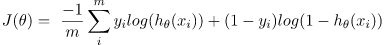
**Đạo hàm Cost function:** 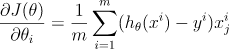
**Công thức Gradient Descent:** 

In [3]:
# xây dựng sigmoid function = g(z)
def sigmoid_func(z):
    return (1.0)/(1 + np.exp(-z))

In [4]:
# cost function J(theta)
def cost_func(X, theta, labels):
    n_samples = X.shape[0]
    z = np.dot(X, theta)
    predict_prob = sigmoid_func(z)
    
    cost_class_1 = -labels*np.log(predict_prob)
    cost_class_2 = (1-labels) * np.log(predict_prob)
    cost = (cost_class_1 - cost_class_2)
    return cost.sum()/n_samples

In [5]:
def grad(X, theta, labels):
    """
        X = (100, 3)
        theta = (3, 1)
    """
    n_samples = X.shape[0]
    z = np.dot(X, theta)
    predict_prob = sigmoid_func(z)
    return np.dot(X.T, predict_prob - labels)/n_samples

In [6]:
def train_model(X, theta_init, labels, eta, num_iter):
    theta = [theta_init]
    for it in range(num_iter):
        theta_new = theta[-1] - eta*grad(X, theta[-1], labels)
        theta.append(theta_new)
    return (it, theta)

In [7]:
features = np.concatenate((np.array([df['Exam_1_Score']]), np.array([df['Exam_2_Score']])),axis = 0)
X = np.concatenate((np.ones((features.T.shape[0], 1), dtype=float), features.T), axis = 1)

labels = np.array([df['Passed']]).T

theta_init = np.array([[0.0, 0.0, 0.0]]).T
num_loops, theta_optimize = train_model(X, theta_init, labels, 0.001, 100000)
theta = theta_optimize[-1]
print(f'num loops = {num_loops}, cost = {cost_func(X, theta, labels)}, theta = {theta.T}')

num loops = 99999, cost = 0.5352735078226911, theta = [[-4.81180027  0.04528064  0.03819149]]


### Visualize data

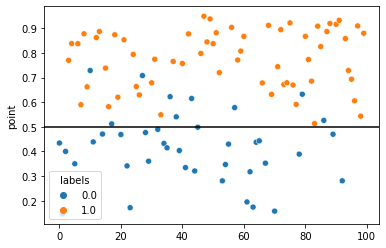

In [8]:
# visualize với xác suất xuất hiện
point = np.array([sigmoid_func(np.dot(feature, theta)) for feature in X])

dt = pd.DataFrame(data=np.concatenate((point, labels), axis = 1))
dt.columns = ['point', 'labels']
sns.scatterplot(data=dt, y='point', x=np.arange(0, 100, 1), hue='labels')
plt.axhline(.5, color='black')
plt.show()

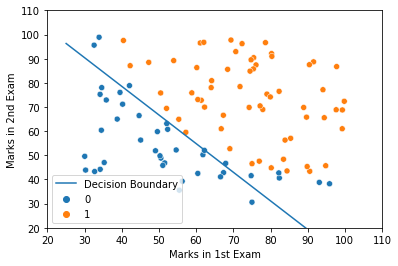

In [9]:
# visualize với dataset ban đầu
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (theta[0, 0] + np.dot(theta[1, 0], x_values)) / theta[2, 0]

sns.scatterplot(data=df, x='Exam_1_Score', y='Exam_2_Score', hue='Passed')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.axis([20, 110, 20, 110])
plt.legend()
plt.show()

### Calculate accuracy

In [10]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [11]:
predict_labels = np.array([[1 if sigmoid_func(np.dot(feature, theta)) >= 0.5 else 0 for feature in X]]).T
print(accuracy(predict_labels, labels))

0.91


## Logistic Regression using Sklearn

In [12]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [13]:
features = np.concatenate((np.array([df['Exam_1_Score']]), np.array([df['Exam_2_Score']])),axis = 0)
X = np.concatenate((np.ones((features.T.shape[0], 1), dtype=float), features.T), axis = 1)
labels = np.array(df['Passed'])
# labels

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X,labels)
print(model.coef_)

[[-2.85831439  0.05214733  0.04531467]]


In [14]:
model.score(X, labels)

0.91